In [25]:
from sympy import *
from dtumathtools import dtuplot, dtutools
init_printing()

In [26]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

In [27]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

M, K, ft, yt, zt

⎛⎡ Iₜ    ⎤  ⎡                      2                   ⎤  ⎡ 2                ⎤
⎜⎢───  0 ⎥  ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c             ⎥  ⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥
⎜⎢  2    ⎥  ⎢k₂ + ────────────────────────      -k₂    ⎥  ⎢──────────────────⎥
⎜⎢l₂     ⎥, ⎢                 2                        ⎥, ⎢        l₂        ⎥
⎜⎢       ⎥  ⎢               l₂                         ⎥  ⎢                  ⎥
⎜⎣ 0   m₂⎦  ⎢                                          ⎥  ⎣        0         ⎦
⎝           ⎣             -k₂               k₂ + k_{b2}⎦                      

                  ⎞
                  ⎟
  ⎡y₁(t)⎤  ⎡z₁(t)⎤⎟
, ⎢     ⎥, ⎢     ⎥⎟
  ⎣y₂(t)⎦  ⎣z₂(t)⎦⎟
                  ⎟
                  ⎠

In [28]:
k2, k3, k4, k5 = symbols('k_2 k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_re = re(f * (cos(w*t) + I*sin(w*t)))
f_sol = solve([Eq(f_re[0], ft[0]), Eq(f_re[1], ft[1])], [f1, f2])
f_til = f.subs(f_sol)
K_til = K + FFHM
diff_eq = Eq(Add(MatMul(M,yt), MatMul(K_til,yt), evaluate=False), f_til)
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
la = symbols('lambda')
A = - M.inv() * K_til
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A = A_func

In [29]:
mydict = {g:9.81,kc:0.7,u:1.48*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
v30 = {ks:0.83, eta:33/100, Fs0:5.2}
v50 = {ks:0.995, eta:21/100, Fs0:8}
v70 = {ks:1.37, eta:10.5/100, Fs0:9.65}

A = A.subs(mydict)  
A

⎡-4296.14915128205                               3569.29775641026             
⎢                                                                             
⎣1141.84397163121   -146.572104018913⋅F_{0s} - 1.41843971631206⋅kₛ⋅(ⅈ⋅η + 1) -

                 ⎤
                 ⎥
 1652.48226950355⎦

In [30]:
A30 = A.subs(v30)

A50 = A.subs(v50)

A70 = A.subs(v70)

In [31]:
A50

⎡-4296.14915128205             3569.29775641026            ⎤
⎢                                                          ⎥
⎣1141.84397163121   -2826.47044917258 - 0.296382978723404⋅ⅈ⎦

In [32]:
A30.eigenvects()

⎡⎛                                            ⎡⎡0.94072907059124 - 0.000116699
⎢⎜-5582.98013091667 - 0.112247452269913⋅ⅈ, 1, ⎢⎢                              
⎣⎝                                            ⎣⎣-0.339158962685261 + 1.2489379

675227937⋅ⅈ ⎤⎤⎞  ⎛                                            ⎡⎡0.851864017758
            ⎥⎥⎟, ⎜-1129.00353573181 - 0.276263186027959⋅ⅈ, 1, ⎢⎢              
9813809e-5⋅ⅈ⎦⎦⎠  ⎝                                            ⎣⎣0.755884661598

36 + 0.000137045273680128⋅ⅈ⎤⎤⎞⎤
                           ⎥⎥⎟⎥
644 + 5.56702420532263e-5⋅ⅈ⎦⎦⎠⎦

In [33]:
A50.eigenvects()
vals = [tup[0] for tup in A30.eigenvects()]
values = [sqrt(val).evalf() for val in vals] + [-sqrt(val).evalf() for val in vals]
print([-re(val)/abs(val) for val in values])
values


[-1.00526465812873e-5, -0.000122348235006096, 1.00526465812873e-5, 0.000122348235006096]


In [34]:
[x[2] for x in A30.eigenvects()]

⎡⎡⎡0.94072907059124 - 0.000116699675227937⋅ⅈ ⎤⎤  ⎡⎡0.85186401775836 + 0.000137
⎢⎢⎢                                          ⎥⎥, ⎢⎢                           
⎣⎣⎣-0.339158962685261 + 1.24893799813809e-5⋅ⅈ⎦⎦  ⎣⎣0.755884661598644 + 5.56702

045273680128⋅ⅈ⎤⎤⎤
              ⎥⎥⎥
420532263e-5⋅ⅈ⎦⎦⎦

In [35]:
def find_faktorer(A):
    løsninger = [x for x in (list(A.eigenvals().keys()))[::-1]]
    values = [sqrt(val) for val in løsninger] + [-sqrt(val) for val in løsninger]
    values = [val for val in values if re(val)/abs(val) > 0]
    xi = list(set([-re(lamb)/abs(lamb) for lamb in values]))
    omega_n = list(set([abs(lamb) for lamb in values]))
    eigenvects = [x[2] for x in A.eigenvects()]
    arguments = [arg(value) for vector in eigenvects for value in vector[0]]
    omega_d = list(set([abs(im(lamb)) for lamb in values]))
    return values, xi, omega_n, arguments, omega_d

values30, xi30, omega_n30, arguments30, omega_d30 = find_faktorer(A30)
values50, xi50, omega_n50, arguments50, omega_d50 = find_faktorer(A50)
values70, xi70, omega_n70, arguments70, omega_d70 = find_faktorer(A70)

In [36]:
arguments30

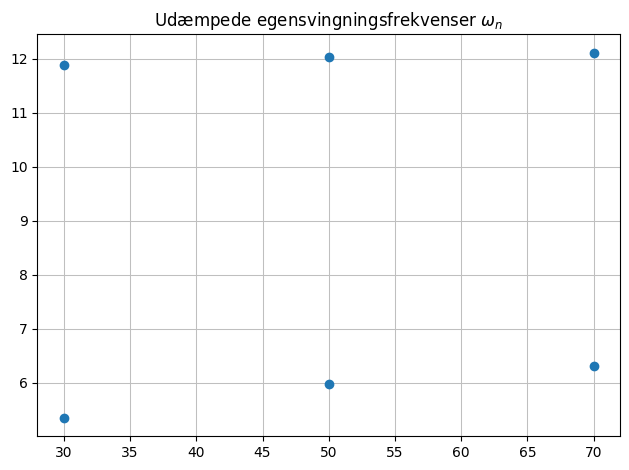

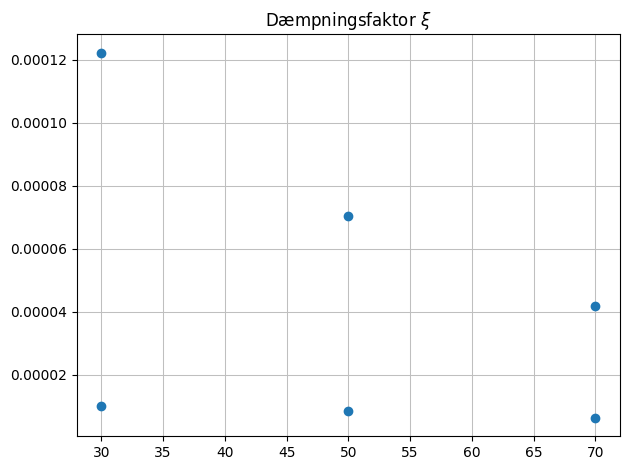

In [53]:
def make_points(number, values):
    points = []
    for i in range(len(values)):
        points.append((number, abs(values[i])))
    return points

valuePoints30 = make_points(30, values30)
valuePoints50 = make_points(50, values50)
valuePoints70 = make_points(70, values70)

xiPoints30 = make_points(30, xi30)
xiPoints50 = make_points(50, xi50) 
xiPoints70 = make_points(70, xi70)

valuePoints = [valuePoints30, valuePoints50, valuePoints70]
# omskrivning til frekvens ved at dividere med 2*pi
points = [[val[0], val[1]/(2*pi)] for lst in valuePoints for val in lst]
x = [val[0] for val in points]
y = [val[1] for val in points]

dtuplot.scatter(x,y, title="Udæmpede egensvingningsfrekvenser $\omega_n$")

xiPoints = [xiPoints30, xiPoints50, xiPoints70]
points = [[val[0], val[1]] for lst in xiPoints for val in lst]
x = [val[0] for val in points]
y = [val[1] for val in points]

dtuplot.scatter(x,y, title=f"Dæmpningsfaktor $\\xi$")


---

## 6, 7, 8 er 30 grader
## 9 ved 50 grader 
### Skal være længst væk fra egensvingningsfrekvenserne

---

In [38]:
values50[0].evalf()

In [39]:
C_1, xi, omega_n, t, A_11, A_12, omega_d, phi_11, phi_12, phi_c = symbols("C_1, xi, omega_n, t, A_11, A_12, omega_d, phi_11, phi_12, phi_c")
y = C_1*exp(-xi*omega_n*t)*Matrix([A_11*cos(omega_d*t+phi_11+phi_c), A_12*cos(omega_d*t+phi_12+phi_c)])
y1 = y
y2 = y
y1

⎡        -ωₙ⋅t⋅ξ                       ⎤
⎢A₁₁⋅C₁⋅ℯ       ⋅cos(ω_d⋅t + φ₁₁ + φ_c)⎥
⎢                                      ⎥
⎢        -ωₙ⋅t⋅ξ                       ⎥
⎣A₁₂⋅C₁⋅ℯ       ⋅cos(ω_d⋅t + φ₁₂ + φ_c)⎦

In [40]:
c = 1
C_1_bestemt, phi_c1_bestemt = abs(c), arg(c)
y1 = y1.subs({
    C_1:C_1_bestemt,
    phi_c:phi_c1_bestemt,
    xi: xi30[0],
    omega_n: omega_n30[0],
    A_11: A30[0],
    A_12: A30[1],
    omega_n: omega_n30[0],
    phi_11: arguments30[0],
    phi_12: arguments30[1],
    omega_d: omega_d30[0],
})

y2 = y1.subs({
    C_1:C_1_bestemt,
    phi_c:phi_c1_bestemt,
    xi: xi30[1],
    omega_n: omega_n30[1],
    A_11: A30[2],
    A_12: A30[3],
    omega_n: omega_n30[1],
    phi_11: arguments30[2],
    phi_12: arguments30[3],
    omega_d: omega_d30[1],
})

y_hom = y1 + y2
y_hom

⎡                  0.00411098002066783⋅t                                      
⎢-8592.2983025641⋅ℯ                     ⋅cos(74.7193424186861⋅t - 0.0001240523
⎢                                                                             
⎢                   0.00411098002066783⋅t                                     
⎣-7138.59551282051⋅ℯ                     ⋅cos(74.7193424186861⋅t - 3.682456119

         ⎤
74139945)⎥
         ⎥
         ⎥
3524e-5) ⎦

---
### 4.8

In [41]:
def eigenvects(A):
    return [x[2][0] for x in A.eigenvects()[::-1]]

eigenvects30 = eigenvects(A30)
eigenvects50 = eigenvects(A50)
eigenvects70 = eigenvects(A70)

display(eigenvects30)
display(eigenvects50)
display(eigenvects70)

⎡⎡0.85186401775836 + 0.000137045273680128⋅ⅈ⎤  ⎡0.94072907059124 - 0.0001166996
⎢⎢                                         ⎥, ⎢                               
⎣⎣0.755884661598644 + 5.56702420532263e-5⋅ⅈ⎦  ⎣-0.339158962685261 + 1.24893799

75227937⋅ⅈ ⎤⎤
           ⎥⎥
813809e-5⋅ⅈ⎦⎦

⎡⎡0.893463241991054 + 0.000103788958765861⋅ⅈ⎤  ⎡ 0.92974407328081 - 8.60676996
⎢⎢                                          ⎥, ⎢                              
⎣⎣0.721726692707693 + 3.40559572172235e-5⋅ⅈ ⎦  ⎣-0.368206396897298 + 8.6872367

526835e-5⋅ⅈ ⎤⎤
            ⎥⎥
4734648e-6⋅ⅈ⎦⎦

⎡⎡0.917120237260449 + 7.01365590453933e-5⋅ⅈ⎤  ⎡ 0.92223510798736 - 5.755937621
⎢⎢                                         ⎥, ⎢                               
⎣⎣0.699836968026036 + 1.96820194803265e-5⋅ⅈ⎦  ⎣-0.386629541360852 + 5.43673063

2278e-5⋅ⅈ  ⎤⎤
           ⎥⎥
220217e-6⋅ⅈ⎦⎦

In [42]:
A[0]/A[1], A[2]/A[3]

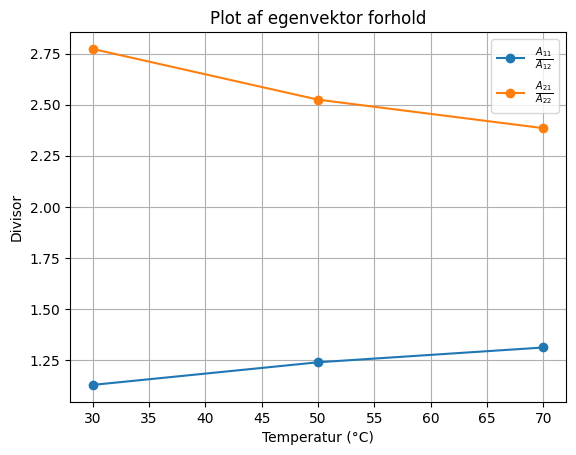

In [43]:
import matplotlib.pyplot as plt
import importlib
importlib.reload(plt)

def get_divs(A):
    return A[0][0]/A[0][1], A[1][0]/A[1][1]

div_A11_A12 = [abs(get_divs(x)[0]) for x in [eigenvects30, eigenvects50, eigenvects70]]
div_A21_A22 = [abs(get_divs(x)[1]) for x in [eigenvects30, eigenvects50, eigenvects70]]

display(div_A11_A12)
display(div_A21_A22)

x = [30, 50, 70]
plt.plot(x, div_A11_A12, marker='o', linestyle='-', label = "$\\frac{A_{11}}{A_{12}}$")
plt.plot(x, div_A21_A22, marker='o', linestyle='-', label = "$\\frac{A_{21}}{A_{22}}$")
plt.grid(True)
plt.legend()
plt.ylabel("Divisor")
plt.xlabel("Temperatur (°C)")
plt.title("Plot af egenvektor forhold")
plt.show()


70 grader for blå (da faktoren er mindst - det vil vi gerne, da faktoren skal være så lille som muligt, så der er så få svingninger i akslen)

30 grader for orange

Dette er forbedholdt, at vi optimerer for så små svingninger i akslen som muligt